# EDA (데이터 탐색하기)

1. 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

- 데이터 확인하기

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

 - 59개의 피처(열)가 있으며, id와 target을 제외하면 57개의 피처가 있음
 - 총 595,212 행이 있으며, 결측치는 -1 로 표현되어 있음
 - 데이터 유형별로 나눠 봐야겠다

#### **컬럼 설명**
ps_
- Porto Seguro (보험사 이름) 약자

ind (individual)
- 개인(피보험자)의 인구통계학적 특성 (나이, 성별, 가족관계 등)

reg (region)
- 지역 관련 변수 (거주지, 등록지 등)

car (car/vehicle)
- 차량 특성과 관련된 변수

calc (calculated features)
- 보험사 내부 계산을 통해 생성된 파생 변수 (리스크 점수, 내부 스코어링 등)

cat (categorical)
- 범주형 변수 (예: 색상, 종류, 등급 등)

bin (binary)
- 이진 변수 (0/1, 예: Yes/No, True/False)

In [4]:
# 피처 유형별로 나누기
all_features = train.columns.drop(['id', 'target'])

# 이진형(binary) 피처
bin_features = [col for col in all_features if col.endswith('_bin')]

# 범주형(categorical) 피처
cat_features = [col for col in all_features if col.endswith('_cat')]

# 수치형(continuous) 또는 순서형(ordinal) 피처
# _bin, _cat 접미사가 없고, id, target이 아닌 피처
numeric_features = [col for col in all_features if not (col.endswith('_bin') or col.endswith('_cat'))]
print(f"이진형 피처 ({len(bin_features)}개): {bin_features}")
print(f"범주형 피처 ({len(cat_features)}개): {cat_features}")
print(f"수치형/순서형 피처 ({len(numeric_features)}개): {numeric_features}")

이진형 피처 (17개): ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
범주형 피처 (14개): ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
수치형/순서형 피처 (26개): ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


- 결측값 확인하기

In [5]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col]== -1)
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 피처는: {col}입니다, 해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append(col)

missing_col = check_missing_col(train)

결측치가 있는 피처는: ps_ind_02_cat입니다, 해당 컬럼에 총 216개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_ind_04_cat입니다, 해당 컬럼에 총 83개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_ind_05_cat입니다, 해당 컬럼에 총 5809개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_reg_03입니다, 해당 컬럼에 총 107772개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_car_01_cat입니다, 해당 컬럼에 총 107개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_car_02_cat입니다, 해당 컬럼에 총 5개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_car_03_cat입니다, 해당 컬럼에 총 411231개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_car_05_cat입니다, 해당 컬럼에 총 266551개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_car_07_cat입니다, 해당 컬럼에 총 11489개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_car_09_cat입니다, 해당 컬럼에 총 569개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_car_11입니다, 해당 컬럼에 총 5개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_car_12입니다, 해당 컬럼에 총 1개의 결측치가 존재합니다.
결측치가 있는 피처는: ps_car_14입니다, 해당 컬럼에 총 42620개의 결측치가 존재합니다.


- 시각화 통해서 데이터 분석하기

Target=0 (No Claim): 573518 (96.36%)
Target=1 (Claim): 21694 (3.64%)


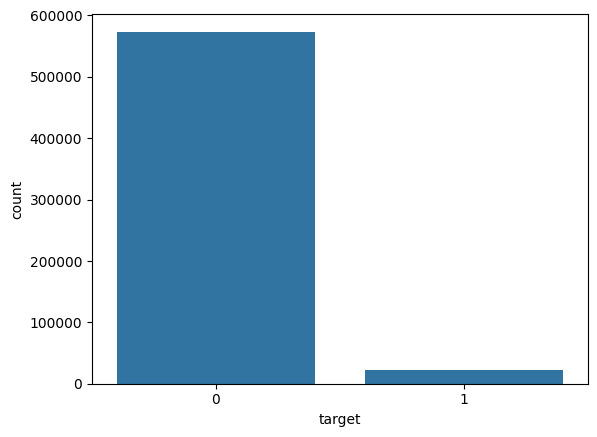

In [6]:
# 타겟값 분포 확인
target_count = train['target'].value_counts()
print(f"Target=0 (No Claim): {target_count[0]} ({target_count[0] / len(train) * 100:.2f}%)")
print(f"Target=1 (Claim): {target_count[1]} ({target_count[1] / len(train) * 100:.2f}%)")

sns.countplot(x='target', data=train)
plt.show()

- 안전 운전자의 비율이 약 94% 나 되는 불균형 데이터 셋
- 정확도(Accuracy)의 함정: 만약 모델이 모든 운전자에 대해 "보험 청구를 하지 않는다(Target=0)"라고만 예측해도, 정확도는 96.36%가 나옵니다.
     수치는 높아 보이지만, 정작 우리가 예측해야 할 '보험 청구'는 단 하나도 맞추지 못하는 무용지물 모델이 됩니다.

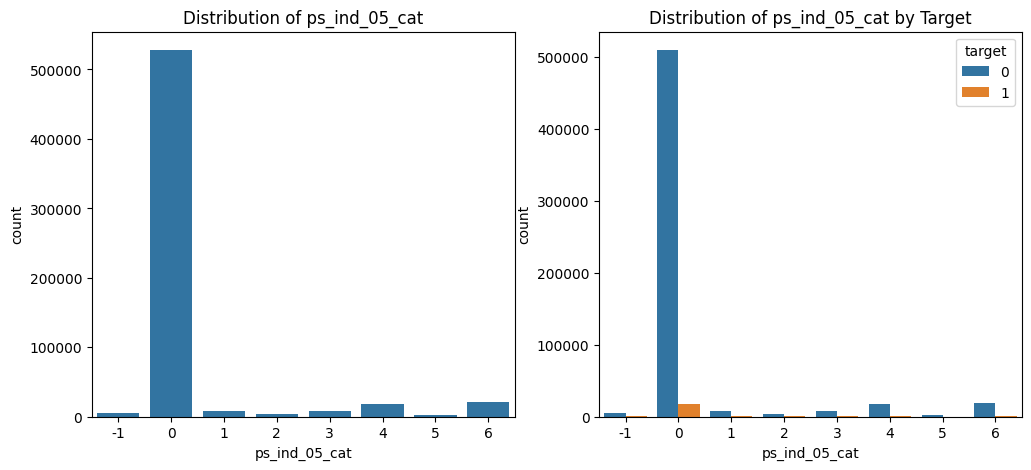

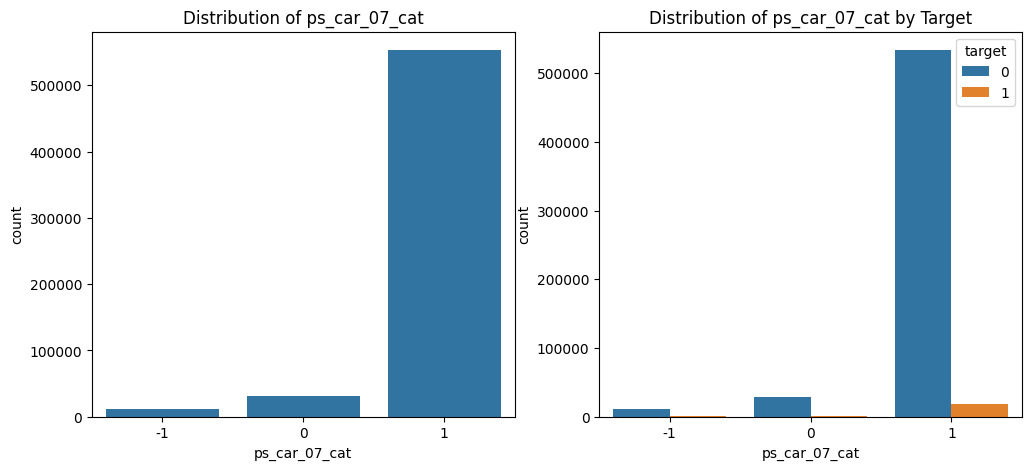

In [7]:
# 타겟값에 따른 범주형 피처 분포 시각화 함수
def plot_categorical_features(feature_name):
  plt.figure(figsize=(12, 5))

  # 전체 데이터에서의 분포
  plt.subplot(1, 2, 1)
  sns.countplot(x=feature_name, data=train)
  plt.title(f'Distribution of {feature_name}')

  # 타겟값에 따른 분포
  plt.subplot(1, 2, 2)
  sns.countplot(x=feature_name, hue='target', data=train)
  plt.title(f'Distribution of {feature_name} by Target')
  plt.show()

# 예시 피처 시각화
plot_categorical_features('ps_ind_05_cat')
plot_categorical_features('ps_car_07_cat')

# 관심있는 다른 범주형 피처도 확인해보세요.
# plot_categorical_features('ps_car_04_cat')

/tmp/ipython-input-4122583505.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 0, feature_name], label='Target 0', color='blue')
/tmp/ipython-input-4122583505.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 1, feature_name], label=

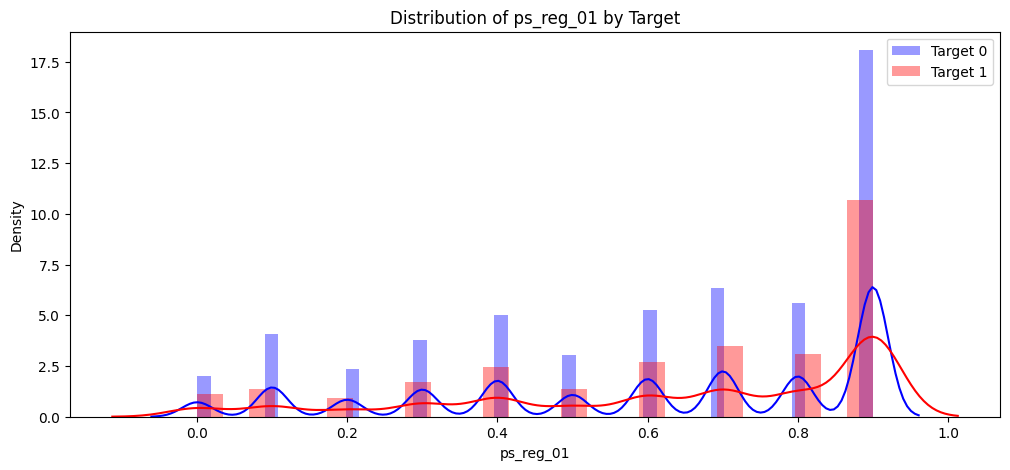

/tmp/ipython-input-4122583505.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 0, feature_name], label='Target 0', color='blue')
/tmp/ipython-input-4122583505.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 1, feature_name], label=

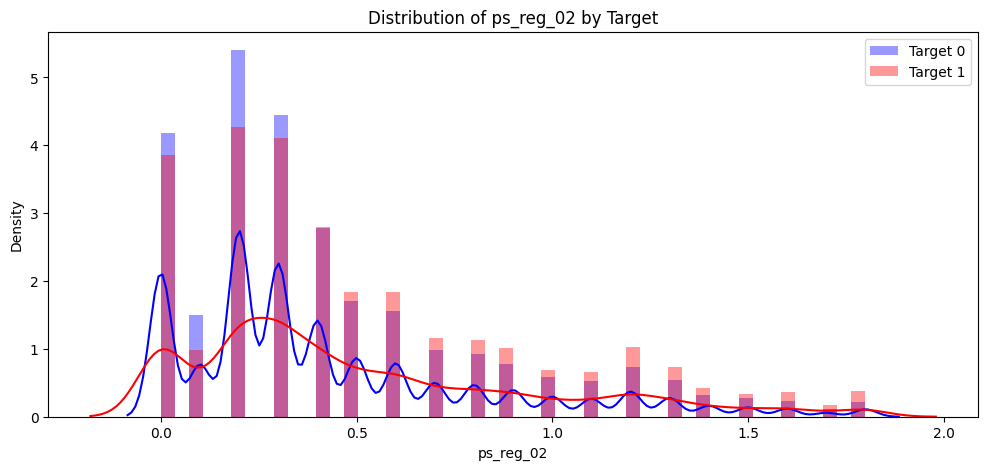

/tmp/ipython-input-4122583505.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 0, feature_name], label='Target 0', color='blue')
/tmp/ipython-input-4122583505.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.loc[train['target'] == 1, feature_name], label=

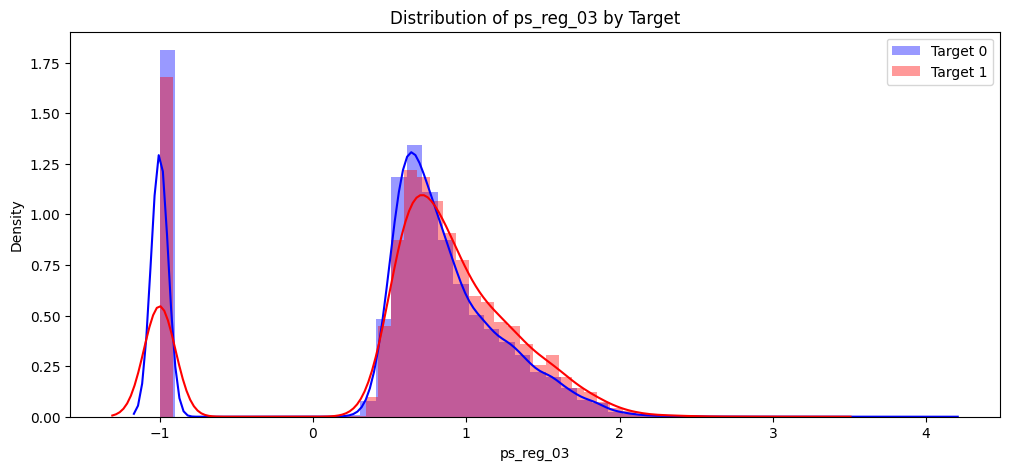

In [8]:
# 타겟값에 따른 수치형 피처 분포 시각화 함수
def plot_numerical_features(feature_name):
    plt.figure(figsize=(12, 5))

    # 타겟값이 0인 경우의 분포
    sns.distplot(train.loc[train['target'] == 0, feature_name], label='Target 0', color='blue')

    # 타겟값이 1인 경우의 분포
    sns.distplot(train.loc[train['target'] == 1, feature_name], label='Target 1', color='red')
    plt.title(f'Distribution of {feature_name} by Target')
    plt.legend()
    plt.show()

# 예시 피처 시각화
plot_numerical_features('ps_reg_01')
plot_numerical_features('ps_reg_02')
plot_numerical_features('ps_reg_03') # 결측치가 제일 많았던 피처

Target=0과 Target=1의 분포 모양이 많이 다르면 → 해당 피처가 분류에 유용할 가능성이 높음

두 분포가 거의 겹치면 → 피처 단독으로는 구분력이 떨어짐

위의 이미지중 reg03은?
- 결측 여부 자체가 중요한 피처일 가능성

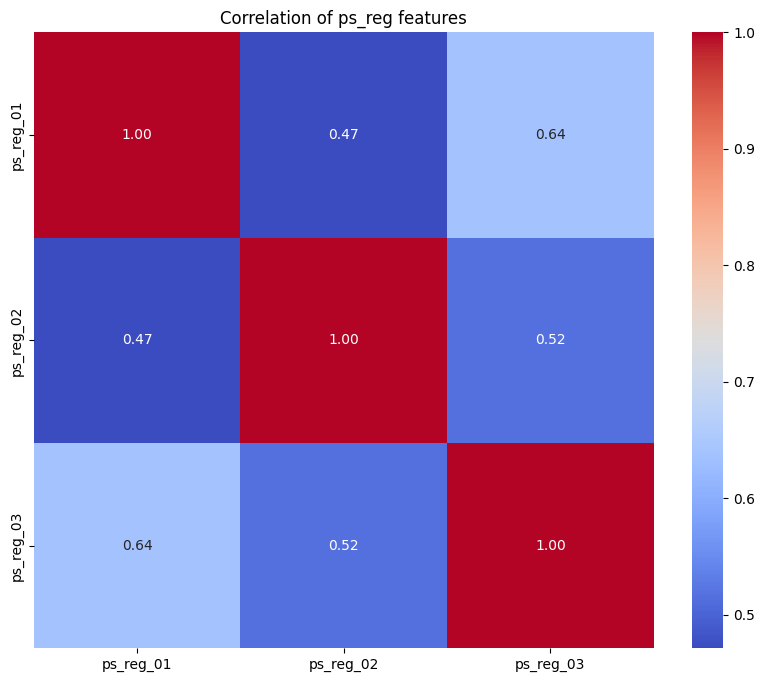

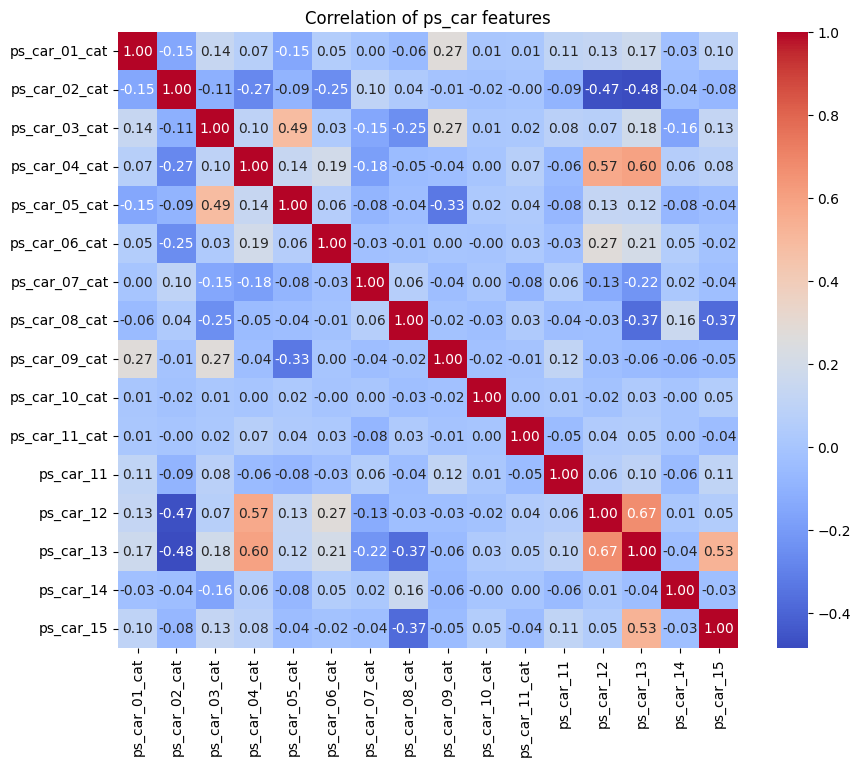

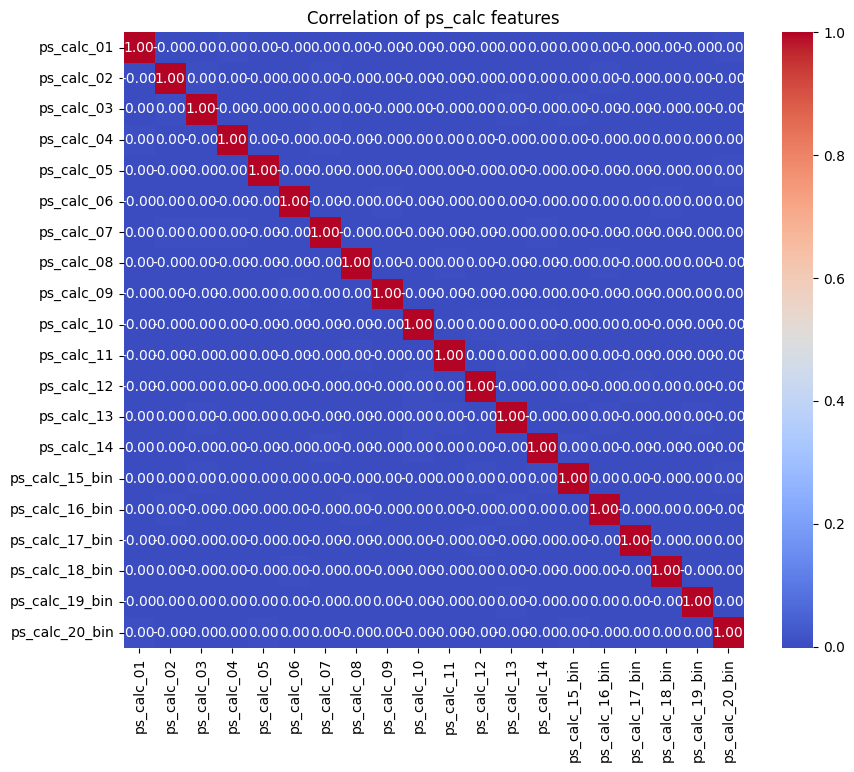

In [9]:
# 상관관계 히트맵 시각화 함수
def plot_correlation_heatmap(features, title):
    corr = train[features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(title)
    plt.show()

# ps_reg 피처 그룹
reg_features = [col for col in all_features if 'ps_reg' in col]
plot_correlation_heatmap(reg_features, 'Correlation of ps_reg features')

# ps_car 피처 그룹 (수치형만)
car_numerical_features = [col for col in all_features if 'ps_car' in col]
plot_correlation_heatmap(car_numerical_features, 'Correlation of ps_car features')

# ps_calc 피처 그룹 (수치형만)
calc_numerical_features = [col for col in all_features if 'ps_calc' in col]
plot_correlation_heatmap(calc_numerical_features, 'Correlation of ps_calc features')

calc 변수들이 각각 독립적이긴 하지만, 실제 예측 기여도는 낮아보임.

### 베이스라인 모델 개발
 - LightGBM
 - 성능 좋으면서 가벼워 Kaggle 대회에서 인기가 많음
 - 과감하게 결측치가 너무 많은 feature를 제거했음.

1. 라이브러리 import

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier, early_stopping
from sklearn.metrics import roc_auc_score

In [16]:
# 1. 데이터 준비
# 훈련, 테스트 데이터 다시 불러오기 (혹시 모르니)
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')
sample_submission = pd.read_csv('sample_submission.csv', index_col='id')

# EDA에서 얻은 가설을 바탕으로 불필요한 피처 제거
# ps_calc_* 피처들은 정보력이 거의 없으므로 제거
calc_features = [col for col in train.columns if 'calc' in col]

# 결측치가 너무 많은 피처 제거
high_missing_features = ['ps_car_03_cat', 'ps_car_05_cat']
features_to_drop = calc_features + high_missing_features
train = train.drop(columns=features_to_drop)
test = test.drop(columns=features_to_drop)

# -1을 NaN으로 변환하여 결측치 처리하기 쉽게 만듦
train = train.replace(-1, np.nan)
test = test.replace(-1, np.nan)

# 남은 범주형 피처들에 대해 간단한 결측치 처리 (최빈값으로 대체)
# LightGBM은 NaN을 스스로 처리할 수 있지만, 명시적으로 처리하는 것이 좋을 수 있음
cat_features = [col for col in train.columns if col.endswith('_cat')]
for col in cat_features:
    mode_val = train[col].mode()[0]
    train[col] = train[col].fillna(mode_val)
    test[col] = test[col].fillna(mode_val)

# 타겟 변수와 피처 분리
X = train.drop(columns=['target'])
y = train['target']

In [6]:
# 2. 평가지표 및 모델 설정
# 지니 계수 계산 함수
def gini(y_true, y_pred):
    # (y_true, y_pred)를 y_pred 순으로 정렬
    sorted_by_pred = sorted(zip(y_true, y_pred), key=lambda x: x[1])
    y_true_sorted = [x[0] for x in sorted_by_pred]

    n = len(y_true_sorted)
    cum_y_true = np.cumsum(y_true_sorted)
    # 로렌츠 곡선下面积
    lorentz_area = np.sum(cum_y_true) / np.sum(y_true_sorted)
    # 지니 계수
    gini_coef = (lorentz_area - (n + 1) / 2) / n
    return gini_coef

def normalized_gini(y_true, y_pred):
    return gini(y_true, y_pred) / gini(y_true, y_true)

# StratifiedKFold 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# LightGBM 모델 설정
lgbm = LGBMClassifier(objective='binary',
                      metric='auc',
                      n_estimators=1000, # 넉넉하게 설정, 조기 종료 사용
                      learning_rate=0.05,
                      num_leaves=31,
                      max_depth=-1,
                      random_state=42)

In [13]:
# 3. 교차 검증 및 훈련
oof_preds = np.zeros(len(train))
test_preds = np.zeros(len(test))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== Fold {fold+1} =====")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # 조기 종료(Early Stopping)를 사용하여 모델 훈련
    lgbm.fit(X_train, y_train,
             eval_set=[(X_val, y_val)],
             eval_metric='auc',
             callbacks=[
                 # 100번 동안 검증 점수가 향상되지 않으면 훈련 중지
                 early_stopping(100, verbose=False)
             ])

    # 검증 데이터 예측
    val_preds = lgbm.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds
    # 테스트 데이터 예측 (5개 폴드의 예측을 평균냄)
    test_preds += lgbm.predict_proba(test)[:, 1] / skf.n_splits

# 전체 검증 데이터에 대한 지니 계수 계산
gini_score = normalized_gini(y, oof_preds)
print(f"\n===== OOF Gini Score: {gini_score:.6f} =====")

===== Fold 1 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
===== Fold 2 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.125782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 476169, numb

In [14]:
# 4. 제출 파일 생성
submission = sample_submission.copy()
submission['target'] = test_preds
submission.to_csv('baseline_submission.csv')

print("\n'baseline_submission.csv' has been created successfully!")


'baseline_submission.csv' has been created successfully!


In [15]:
baseline_submission = pd.read_csv('baseline_submission.csv')
baseline_submission

,id,target
0,0,0.027882
1,1,0.026419
2,2,0.028039
3,3,0.015537
4,4,0.037303
...,...,...
892811,1488022,0.097838
892812,1488023,0.041086
892813,1488024,0.040409
892814,1488025,0.023752


In [16]:
len(test)

892816

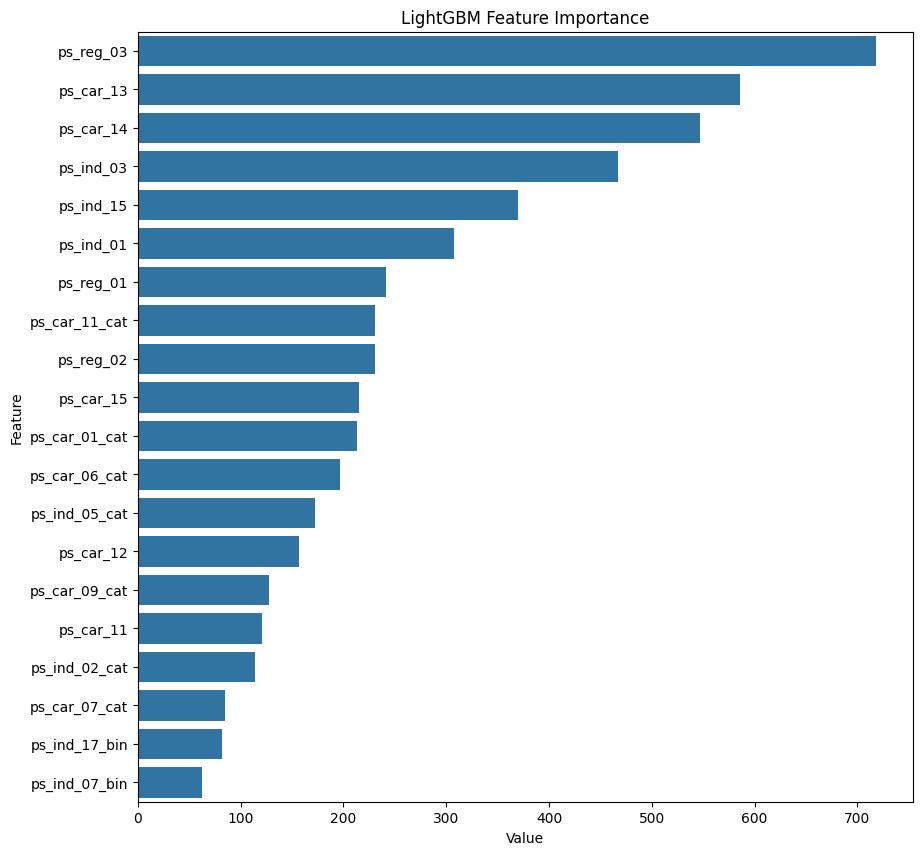

In [17]:
# 피처 중요도 시각화
def plot_feature_importance(model, features, num=20):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(num))
    plt.title('LightGBM Feature Importance')
    plt.show()

# 베이스라인 모델 훈련 코드 실행 후, 아래 코드를 실행하세요.
# (lgbm 객체와 X 변수가 메모리에 있어야 합니다)
plot_feature_importance(lgbm, X)

  #### 개선 아이디어 1: 피처 엔지니어링 - 원-핫 인코딩 (One-Hot Encoding)


  현재 우리 모델은 ps_ind_02_cat 같은 범주형 피처를 단순한 숫자(1, 2, 3, 4...)로 취급하고 있습니다. 하지만 모델은 이 숫자들을 크기나 순서가
  있는 값으로 오해할 수 있습니다(예: '4번 범주가 2번 범주보다 두 배 더 중요하다'라고 잘못 학습).


  원-핫 인코딩은 이런 오해를 막기 위해 각 범주 값을 독립적인 피처(열)로 만들어주는 기법입니다. 예를 들어 ps_ind_02_cat에 [1, 2, 3] 세 종류의
  값이 있었다면, ps_ind_02_cat_1, ps_ind_02_cat_2, ps_ind_02_cat_3 이라는 세 개의 새로운 피처를 만들고 해당하는 곳에만 1, 나머지는 0으로
  채웁니다.

In [17]:
# 원-핫 인코딩을 위해 훈련/테스트 데이터 합치기
all_data = pd.concat([X, test], axis=0)

# 범주형 피처에 대해 원-핫 인코딩 수행
cat_features = [col for col in all_data.columns if col.endswith('_cat')]

# pd.get_dummies가 자동으로 NaN이 아닌 범주만 인코딩해줌
all_data = pd.get_dummies(all_data, columns=cat_features, dummy_na=False) # dummy_na=False는 NaN을 위한 열을 만들지 않음

# 훈련/테스트 데이터 다시 분리
X = all_data.iloc[:len(train)]
test = all_data.iloc[len(train):]

In [19]:
# 3. 교차 검증 및 훈련
oof_preds = np.zeros(len(train))
test_preds = np.zeros(len(test))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== Fold {fold+1} =====")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # 조기 종료(Early Stopping)를 사용하여 모델 훈련
    lgbm.fit(X_train, y_train,
             eval_set=[(X_val, y_val)],
             eval_metric='auc',
             callbacks=[
                 # 100번 동안 검증 점수가 향상되지 않으면 훈련 중지
                 early_stopping(100, verbose=False)
             ])

    # 검증 데이터 예측
    val_preds = lgbm.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds
    # 테스트 데이터 예측 (5개 폴드의 예측을 평균냄)
    test_preds += lgbm.predict_proba(test)[:, 1] / skf.n_splits

# 전체 검증 데이터에 대한 지니 계수 계산
gini_score = normalized_gini(y, oof_preds)
print(f"\n===== OOF Gini Score: {gini_score:.6f} =====")

===== Fold 1 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.260110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
===== Fold 2 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.224648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

In [20]:
# 4. 제출 파일 생성
submission = sample_submission.copy()
submission['target'] = test_preds
submission.to_csv('submission_one_hot.csv')

print("\n'submission_one_hot.csv' has been created successfully!")


'submission_one_hot.csv' has been created successfully!


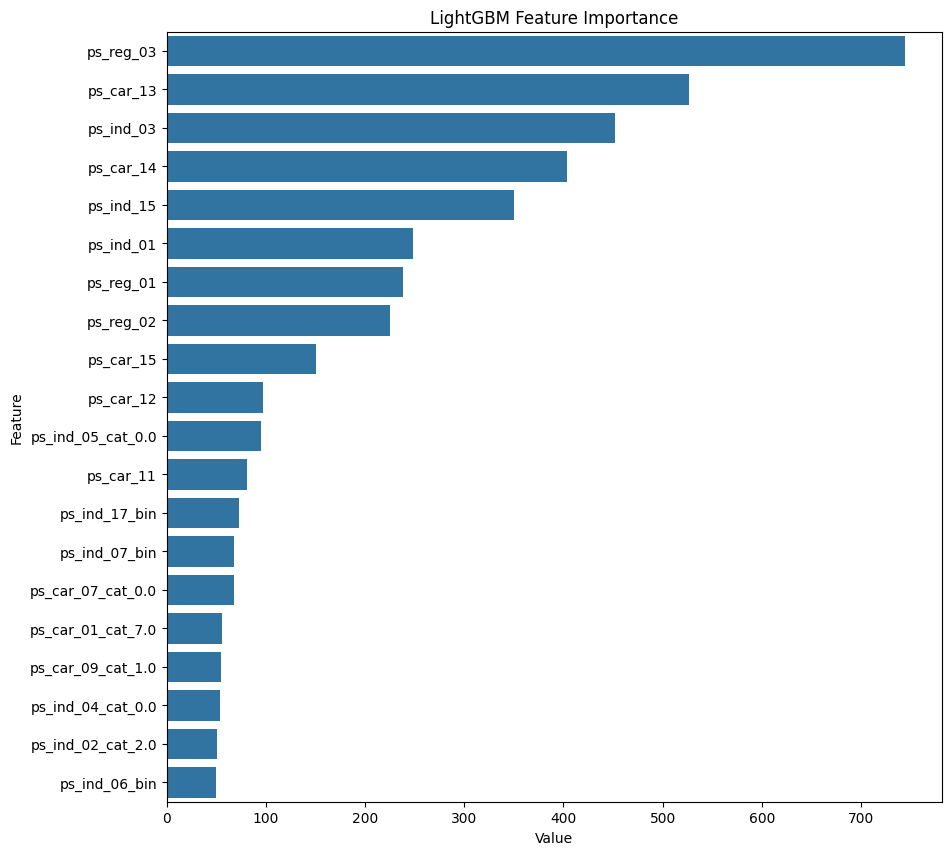

In [21]:
plot_feature_importance(lgbm, X)

  ### 다음 성능 개선 아이디어: 하이퍼파라미터 튜닝


  피처 엔지니어링으로 큰 성공을 거두었으니, 이제 모델 자체를 최적화하여 성능을 한 단계 더 끌어올려 보겠습니다. 체크리스트의 '모델 훈련 with
  하이퍼파라미터 최적화' 단계에 해당합니다.


  하이퍼파라미터(Hyperparameter)란, 모델이 데이터로부터 학습하는 값(파라미터)이 아니라, 모델이 어떻게 학습할지를 우리가 직접 설정해주는
  '설정값'입니다. 예를 들어 learning_rate(학습률), n_estimators(트리 개수) 등이 여기에 해당합니다.


  최적의 하이퍼파라미터 조합을 찾으면 모델의 성능을 극대화할 수 있습니다.

  개선 아이디어 2: 주요 하이퍼파라미터 값 조정


  현재 우리는 비교적 기본적인 설정값을 사용하고 있습니다. 일반적인 성능 개선 전략 중 하나는 학습률(`learning_rate`)을 낮추고, 대신 더 많은
  트리(`n_estimators`)를 사용하여 더 정교하고 안정적인 모델을 만드는 것입니다. 또한, 과적합을 방지하기 위해 각 트리를 만들 때 일부 데이터와
  피처만 무작위로 사용하는 기법도 효과적입니다.


In [22]:
# LightGBM 모델 설정 (하이퍼파라미터 튜닝)
lgbm = LGBMClassifier(objective='binary',
                      metric='auc',
                      n_estimators=2000,      # 트리를 더 많이 만듦
                      learning_rate=0.01,     # 학습률을 낮춰 더 정교하게 학습
                      num_leaves=31,          # 그대로 유지
                      max_depth=-1,           # 그대로 유지
                      subsample=0.7,          # 각 트리를 훈련할 때 데이터의 70%만 무작위로 사용 (과적합 방지)
                      colsample_bytree=0.7,   # 각 트리를 훈련할 때 피처의 70%만 무작위로 사용 (과적합 방지)
                      random_state=42,
                      n_jobs=-1)              # 모든 CPU 코어를 사용하여 훈련 속도 향상

In [23]:
# 3. 교차 검증 및 훈련
oof_preds = np.zeros(len(train))
test_preds = np.zeros(len(test))

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== Fold {fold+1} =====")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # 조기 종료(Early Stopping)를 사용하여 모델 훈련
    lgbm.fit(X_train, y_train,
             eval_set=[(X_val, y_val)],
             eval_metric='auc',
             callbacks=[
                 # 100번 동안 검증 점수가 향상되지 않으면 훈련 중지
                 early_stopping(100, verbose=False)
             ])

    # 검증 데이터 예측
    val_preds = lgbm.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds
    # 테스트 데이터 예측 (5개 폴드의 예측을 평균냄)
    test_preds += lgbm.predict_proba(test)[:, 1] / skf.n_splits

# 전체 검증 데이터에 대한 지니 계수 계산
gini_score = normalized_gini(y, oof_preds)
print(f"\n===== OOF Gini Score: {gini_score:.6f} =====")

===== Fold 1 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.207024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
===== Fold 2 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.186121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

In [24]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 15.0 MB/s eta 0:00:00


In [25]:
import optuna

# --- Optuna를 위한 목적 함수(Objective Function) 정의 ---
def objective(trial):
    # 1. 튜닝할 하이퍼파라미터의 탐색 범위 정의
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'random_state': 42,
        'n_estimators': 2000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'num_leaves': trial.suggest_int('num_leaves', 20, 50),
        'max_depth': trial.suggest_int('max_depth', 5, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 1.0), # L1 정규화
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 1.0), # L2 정규화
        'n_jobs': -1,

        # === GPU 설정 ===
        'device': 'gpu',        # GPU 사용
        'gpu_platform_id': 0,   # (여러 GPU 있을 때 선택용, 단일 GPU면 생략 가능)
        'gpu_device_id': 0
    }

    # 2. 교차 검증 설정
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof_preds = np.zeros(len(X))

    # 3. 교차 검증 훈련 및 평가
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
        model = LGBMClassifier(**params)
        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  eval_metric='auc',
                  callbacks=[
                      early_stopping(100, verbose=False)
                  ])
        val_preds = model.predict_proba(X_val)[:, 1]
        oof_preds[val_idx] = val_preds

    # 4. 최종 검증 점수(Gini) 계산 후 반환
    # (이전에 정의한 normalized_gini 함수가 메모리에 있어야 합니다)
    gini_score = normalized_gini(y, oof_preds)
    return gini_score

# --- Optuna 스터디 생성 및 최적화 실행 ---
# 'direction="maximize"'는 objective 함수가 반환하는 점수를 최대화하는 방향으로 탐색하라는 의미
study = optuna.create_study(direction="maximize")

# 30번의 다른 하이퍼파라미터 조합을 시도하여 최적의 값을 찾음
# (시간이 있다면 n_trials 값을 늘려보세요)
study.optimize(objective, n_trials=30)

# --- 최적화 결과 확인 ---
print("\n===== Optuna Optimization Finished =====")
print("Best Gini Score:", study.best_value)
print("Best Params:", study.best_params)

[I 2025-09-09 07:54:31,671] A new study created in memory with name: no-name-99ab2e9d-8a8b-4de8-b83e-16c6dcd912a3


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017939 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 07:58:01,063] Trial 0 finished with value: 0.2832269048842434 and parameters: {'learning_rate': 0.01914153429315331, 'num_leaves': 22, 'max_depth': 10, 'subsample': 0.6777261269541873, 'colsample_bytree': 0.7878426442555523, 'reg_alpha': 0.7947933172351738, 'reg_lambda': 0.7473396236664733}. Best is trial 0 with value: 0.2832269048842434.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017936 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 07:59:56,466] Trial 1 finished with value: 0.2840848533033625 and parameters: {'learning_rate': 0.044918635726336524, 'num_leaves': 22, 'max_depth': 9, 'subsample': 0.7251394792331992, 'colsample_bytree': 0.6802635411084286, 'reg_alpha': 0.8388185886308801, 'reg_lambda': 0.7004495580003293}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017910 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:01:27,044] Trial 2 finished with value: 0.2823796152877651 and parameters: {'learning_rate': 0.040428153565534294, 'num_leaves': 32, 'max_depth': 10, 'subsample': 0.6954456086334931, 'colsample_bytree': 0.8258338261503221, 'reg_alpha': 0.04765263023981378, 'reg_lambda': 0.3201498088279837}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017894 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:04:18,484] Trial 3 finished with value: 0.28396110660367324 and parameters: {'learning_rate': 0.023830545188959038, 'num_leaves': 48, 'max_depth': 8, 'subsample': 0.7912073351330359, 'colsample_bytree': 0.6498828083765539, 'reg_alpha': 0.3937340923352412, 'reg_lambda': 0.035049551048389}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.020990 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:07:29,497] Trial 4 finished with value: 0.283827274948702 and parameters: {'learning_rate': 0.020074969089755413, 'num_leaves': 40, 'max_depth': 6, 'subsample': 0.7205601928460361, 'colsample_bytree': 0.7754683171171702, 'reg_alpha': 0.47973973561601424, 'reg_lambda': 0.6798855289662655}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017865 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:09:57,466] Trial 5 finished with value: 0.2829479322079063 and parameters: {'learning_rate': 0.031726255949876304, 'num_leaves': 35, 'max_depth': 5, 'subsample': 0.7276705192567925, 'colsample_bytree': 0.8030757689503202, 'reg_alpha': 0.29476475102840005, 'reg_lambda': 0.8246363489572518}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.023063 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:14:46,545] Trial 6 finished with value: 0.283967769091186 and parameters: {'learning_rate': 0.010468344516817042, 'num_leaves': 45, 'max_depth': 9, 'subsample': 0.6336247180283875, 'colsample_bytree': 0.6505697453926607, 'reg_alpha': 0.19882032489178997, 'reg_lambda': 0.8781625580120852}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017944 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:16:47,444] Trial 7 finished with value: 0.28267571750289455 and parameters: {'learning_rate': 0.03162181356980527, 'num_leaves': 26, 'max_depth': 9, 'subsample': 0.723850420484536, 'colsample_bytree': 0.6614140983215613, 'reg_alpha': 0.5548984846594024, 'reg_lambda': 0.02783119350282721}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018075 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:20:11,160] Trial 8 finished with value: 0.2836759450009549 and parameters: {'learning_rate': 0.017199537833977624, 'num_leaves': 49, 'max_depth': 9, 'subsample': 0.6466264301618371, 'colsample_bytree': 0.628024588482116, 'reg_alpha': 0.08704020057901278, 'reg_lambda': 0.12362139825383964}. Best is trial 1 with value: 0.2840848533033625.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018045 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins

[I 2025-09-09 08:23:09,376] Trial 9 finished with value: 0.28420707676296986 and parameters: {'learning_rate': 0.02191472341477991, 'num_leaves': 34, 'max_depth': 6, 'subsample': 0.8032061747898984, 'colsample_bytree': 0.7755158965365303, 'reg_alpha': 0.7622451181960624, 'reg_lambda': 0.7630485926826387}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017799 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:24:54,274] Trial 10 finished with value: 0.2833131637389054 and parameters: {'learning_rate': 0.03763580711362252, 'num_leaves': 30, 'max_depth': 6, 'subsample': 0.8993250630694054, 'colsample_bytree': 0.8893313918156602, 'reg_alpha': 0.9524097546740712, 'reg_lambda': 0.49682560043270246}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017977 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:26:34,863] Trial 11 finished with value: 0.2829083467731971 and parameters: {'learning_rate': 0.046851616076879606, 'num_leaves': 20, 'max_depth': 7, 'subsample': 0.8043561030280043, 'colsample_bytree': 0.714807403090923, 'reg_alpha': 0.7039238940762695, 'reg_lambda': 0.5764074808001494}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018169 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:28:13,791] Trial 12 finished with value: 0.2838349379265344 and parameters: {'learning_rate': 0.04877678854564822, 'num_leaves': 37, 'max_depth': 7, 'subsample': 0.7971731347221295, 'colsample_bytree': 0.7264972184756099, 'reg_alpha': 0.9756483194410883, 'reg_lambda': 0.9177196184134686}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.020027 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:31:25,250] Trial 13 finished with value: 0.28365692443258006 and parameters: {'learning_rate': 0.026337359789701843, 'num_leaves': 28, 'max_depth': 5, 'subsample': 0.8624881515803741, 'colsample_bytree': 0.7033175139710928, 'reg_alpha': 0.7350823649396021, 'reg_lambda': 0.5049580468006023}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.032066 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:33:46,485] Trial 14 finished with value: 0.2839630421602187 and parameters: {'learning_rate': 0.0391172526896788, 'num_leaves': 24, 'max_depth': 8, 'subsample': 0.7704485260762896, 'colsample_bytree': 0.601509474340077, 'reg_alpha': 0.8423197801403023, 'reg_lambda': 0.9961424618062412}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018084 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:38:20,062] Trial 15 finished with value: 0.28358431799490696 and parameters: {'learning_rate': 0.011731406298677017, 'num_leaves': 42, 'max_depth': 6, 'subsample': 0.8407224515894369, 'colsample_bytree': 0.8426606303200125, 'reg_alpha': 0.6256279960732583, 'reg_lambda': 0.6707058798097404}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.026352 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:39:59,197] Trial 16 finished with value: 0.2839953730756275 and parameters: {'learning_rate': 0.04384318342766458, 'num_leaves': 34, 'max_depth': 8, 'subsample': 0.7589410638129546, 'colsample_bytree': 0.7471294684099924, 'reg_alpha': 0.8523438295556882, 'reg_lambda': 0.35973394380780377}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.051328 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 17355, number of negative: 4588

[I 2025-09-09 08:42:11,028] Trial 17 finished with value: 0.2840894384553352 and parameters: {'learning_rate': 0.03437959018079788, 'num_leaves': 39, 'max_depth': 7, 'subsample': 0.6064200235022984, 'colsample_bytree': 0.6762979011867356, 'reg_alpha': 0.6360905166722806, 'reg_lambda': 0.7626779712524485}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018017 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:44:45,742] Trial 18 finished with value: 0.2835907525429478 and parameters: {'learning_rate': 0.026644740074740006, 'num_leaves': 39, 'max_depth': 7, 'subsample': 0.6000362338404548, 'colsample_bytree': 0.7502371574358446, 'reg_alpha': 0.5786683444597708, 'reg_lambda': 0.794076972267658}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018245 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:46:49,450] Trial 19 finished with value: 0.2826445389838711 and parameters: {'learning_rate': 0.03507744671491808, 'num_leaves': 43, 'max_depth': 6, 'subsample': 0.8359286622524682, 'colsample_bytree': 0.6903203243388988, 'reg_alpha': 0.435027130509301, 'reg_lambda': 0.9998821160647482}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.017931 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:51:33,225] Trial 20 finished with value: 0.28314589297760895 and parameters: {'learning_rate': 0.014506551910430581, 'num_leaves': 32, 'max_depth': 5, 'subsample': 0.6026238914476937, 'colsample_bytree': 0.8979704054366957, 'reg_alpha': 0.6791867728480993, 'reg_lambda': 0.5926221371721554}. Best is trial 9 with value: 0.28420707676296986.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018027 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:53:18,014] Trial 21 finished with value: 0.28441883992676126 and parameters: {'learning_rate': 0.04336605796780896, 'num_leaves': 39, 'max_depth': 7, 'subsample': 0.667191305956673, 'colsample_bytree': 0.6836327883556509, 'reg_alpha': 0.8762304300133992, 'reg_lambda': 0.7132750919994877}. Best is trial 21 with value: 0.28441883992676126.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018013 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:55:22,790] Trial 22 finished with value: 0.2845831060021555 and parameters: {'learning_rate': 0.03420794608326385, 'num_leaves': 38, 'max_depth': 7, 'subsample': 0.6413217568876542, 'colsample_bytree': 0.7431271817736341, 'reg_alpha': 0.9236090281863292, 'reg_lambda': 0.8629905105928004}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.019154 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 08:57:19,610] Trial 23 finished with value: 0.2840224866204859 and parameters: {'learning_rate': 0.04242257485744303, 'num_leaves': 35, 'max_depth': 6, 'subsample': 0.664863683533773, 'colsample_bytree': 0.7507040092584522, 'reg_alpha': 0.9189399477713165, 'reg_lambda': 0.8758740600152275}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.065701 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 08:59:42,554] Trial 24 finished with value: 0.2840730452992796 and parameters: {'learning_rate': 0.027316405114878362, 'num_leaves': 37, 'max_depth': 7, 'subsample': 0.6318286236490075, 'colsample_bytree': 0.7707460169996609, 'reg_alpha': 0.7611982515156565, 'reg_lambda': 0.5858776852386804}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018274 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 09:02:19,868] Trial 25 finished with value: 0.28402789399417855 and parameters: {'learning_rate': 0.023058258521599623, 'num_leaves': 46, 'max_depth': 8, 'subsample': 0.6901397360689596, 'colsample_bytree': 0.7312455345022539, 'reg_alpha': 0.9946787901940112, 'reg_lambda': 0.9066714151196271}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.088655 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 09:04:19,992] Trial 26 finished with value: 0.2836476893475294 and parameters: {'learning_rate': 0.03570242106920883, 'num_leaves': 42, 'max_depth': 6, 'subsample': 0.6563902005509143, 'colsample_bytree': 0.8151464729156437, 'reg_alpha': 0.8839702410443669, 'reg_lambda': 0.8087153115398791}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018387 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 09:06:38,991] Trial 27 finished with value: 0.2835347779708619 and parameters: {'learning_rate': 0.02912580630308484, 'num_leaves': 32, 'max_depth': 7, 'subsample': 0.7055895717339948, 'colsample_bytree': 0.7077242632535401, 'reg_alpha': 0.7726237491240762, 'reg_lambda': 0.46406141271513945}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.028344 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-09-09 09:09:58,609] Trial 28 finished with value: 0.2832450080685799 and parameters: {'learning_rate': 0.02354821404060448, 'num_leaves': 37, 'max_depth': 5, 'subsample': 0.6290659038887055, 'colsample_bytree': 0.8534117157935263, 'reg_alpha': 0.9235062476694974, 'reg_lambda': 0.6413857754051071}. Best is trial 22 with value: 0.2845831060021555.


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (9.08 MB) transferred to GPU in 0.018073 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

[I 2025-09-09 09:13:11,356] Trial 29 finished with value: 0.2841673540501866 and parameters: {'learning_rate': 0.01937789361356535, 'num_leaves': 29, 'max_depth': 6, 'subsample': 0.6787225319783508, 'colsample_bytree': 0.7821648609787416, 'reg_alpha': 0.7953315525947258, 'reg_lambda': 0.7357347263037701}. Best is trial 22 with value: 0.2845831060021555.



===== Optuna Optimization Finished =====
Best Gini Score: 0.2845831060021555
Best Params: {'learning_rate': 0.03420794608326385, 'num_leaves': 38, 'max_depth': 7, 'subsample': 0.6413217568876542, 'colsample_bytree': 0.7431271817736341, 'reg_alpha': 0.9236090281863292, 'reg_lambda': 0.8629905105928004}


In [28]:
# 1. Optuna가 찾아준 최적의 하이퍼파라미터
best_params = {
    'learning_rate': 0.03420794608326385,
    'num_leaves': 38,
    'max_depth': 7,
    'subsample': 0.6413217568876542,
    'colsample_bytree': 0.7431271817736341,
    'reg_alpha': 0.9236090281863292,
    'reg_lambda': 0.8629905105928004,
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 42,
    'n_estimators': 2000,
    'n_jobs': -1
}

# 2. 교차 검증 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))
test_preds = np.zeros(len(test)) # 테스트 예측값도 새로 만듦

# 3. 최적 파라미터로 교차 검증 다시 실행
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== Fold {fold+1} =====")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    # 최적 파라미터로 모델 생성
    model = LGBMClassifier(**best_params)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='auc',
              callbacks=[
                  early_stopping(100, verbose=False)
              ])
    val_preds = model.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds
    test_preds += model.predict_proba(test)[:, 1] / skf.n_splits

# 4. 최종 검증 점수(Gini) 재확인
gini_score = normalized_gini(y, oof_preds)
print(f"\n===== Re-validated OOF Gini Score with Best Params: {gini_score:.6f} =====")

# 5. 이 결과로 제출 파일 다시 만들기
submission = pd.read_csv('sample_submission.csv', index_col='id')
submission['target'] = test_preds
submission.to_csv('final_submission_from_cv.csv')

===== Fold 1 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.217105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
===== Fold 2 =====
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.190175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 476169, num

LightBoost 최적화 완료 </br>
개선점3. XGBoost 개발 시작
- XGBoost가 성능이 더 좋다면 대체 가능
- LightBoost와 앙상블 시키는 방법도 생각 가능

In [2]:
import xgboost as xgb
from xgboost.callback import EarlyStopping
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
# import 해주기

In [36]:
# --- XGBoost를 위한 Optuna 목적 함수 정의 ---
def objective_xgb(trial):
    # 1. 튜닝할 XGBoost 하이퍼파라미터의 탐색 범위 정의
    params = {
        'objective': 'binary:logistic', # 이진 분류 문제
        'eval_metric': 'auc',           # 평가지표
        'random_state': 42,
        'n_estimators': 2000,
        # GPU 사용 가능 시, 매우 빠른 학습 가능. CPU 사용 시 'hist' 또는 'auto'
        'tree_method': 'gpu_hist',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.9),
        'gamma': trial.suggest_float('gamma', 0, 1.0), # 분할에 필요한 최소 손실 감소
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 1.0), # L1 정규화
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 1.0), # L2 정규화,
        'n_gpus':-1,
        'early_stopping_rounds': 100

    }

    # 2. 교차 검증 설정
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof_preds = np.zeros(len(X))

    # 3. 교차 검증 훈련 및 평가
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
        model = xgb.XGBClassifier(**params)

        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  verbose=False)
        val_preds = model.predict_proba(X_val)[:, 1]
        oof_preds[val_idx] = val_preds

    # 4. 최종 검증 점수(Gini) 계산 후 반환
    gini_score = normalized_gini(y, oof_preds)
    return gini_score

# --- Optuna 스터디 생성 및 최적화 실행 ---
study_xgb = optuna.create_study(direction="maximize")
# 30~50번 정도 시도하는 것을 추천합니다.
study_xgb.optimize(objective_xgb, n_trials=30)

# --- 최적화 결과 확인 ---
print("\n===== XGBoost Optimization Finished =====")
print("Best Gini Score:", study_xgb.best_value)
print("Best Params:", study_xgb.best_params)
xgb_best_params = study_xgb.best_params

[I 2025-09-09 09:29:00,116] A new study created in memory with name: no-name-6f94c330-e1a1-4086-b763-05de5ab87efa
/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [09:29:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [09:29:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "n_gpus" } are not used.

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [09:29:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if le


===== XGBoost Optimization Finished =====
Best Gini Score: 0.286272906021318
Best Params: {'learning_rate': 0.01360513985610827, 'max_depth': 5, 'subsample': 0.6723083633209394, 'colsample_bytree': 0.8381085690743174, 'gamma': 0.7175879330449897, 'reg_alpha': 0.42338064413698273, 'reg_lambda': 0.6640984566021599}


===== XGBoost Optimization Finished =====
```json
Best Gini Score: 0.286272906021318
Best Params: {
  'learning_rate': 0.01360513985610827,
  'max_depth': 5,
  'subsample': 0.6723083633209394,
  'colsample_bytree': 0.8381085690743174,
  'gamma': 0.7175879330449897,
  'reg_alpha': 0.42338064413698273,
  'reg_lambda': 0.6640984566021599
}
```

In [8]:
# 1. Optuna가 찾아준 최적의 하이퍼파라미터
best_params = {
    'objective': 'binary:logistic', # 이진 분류 문제
    'eval_metric': 'auc',           # 평가지표
    'random_state': 42,
    'n_estimators': 2000,
    # GPU 사용 가능 시, 매우 빠른 학습 가능. CPU 사용 시 'hist' 또는 'auto'
    'tree_method': 'gpu_hist',
    'learning_rate': 0.01360513985610827,
    'max_depth': 5,
    'subsample': 0.6723083633209394,
    'colsample_bytree': 0.8381085690743174,
    'gamma': 0.7175879330449897,
    'reg_alpha': 0.42338064413698273,
    'reg_lambda': 0.6640984566021599,
    'n_jobs': -1,
    'early_stopping_rounds': 100
}

# 2. 교차 검증 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))
test_preds = np.zeros(len(test)) # 테스트 예측값도 새로 만듦

# 3. 최적 파라미터로 교차 검증 다시 실행
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"===== Fold {fold+1} =====")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    # 최적 파라미터로 모델 생성
    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              verbose=False)
    val_preds = model.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_preds
    test_preds += model.predict_proba(test)[:, 1] / skf.n_splits

# 4. 최종 검증 점수(Gini) 재확인
gini_score = normalized_gini(y, oof_preds)
print(f"\n===== Re-validated OOF Gini Score with Best Params: {gini_score:.6f} =====")

# 5. 이 결과로 제출 파일 다시 만들기
submission = pd.read_csv('sample_submission.csv', index_col='id')
submission['target'] = test_preds
submission.to_csv('final_submission_from_cv.csv')

===== Fold 1 =====


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:14:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [23:14:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:729: UserWarning: [23:14:37] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is

===== Fold 2 =====


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:14:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [23:14:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


===== Fold 3 =====


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:14:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [23:14:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


===== Fold 4 =====


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:14:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [23:15:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


===== Fold 5 =====


/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [23:15:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [23:15:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:



===== Re-validated OOF Gini Score with Best Params: 0.285064 =====


앙상블 기법으로 두 모델 합치기

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

# 1. 데이터 로드
# 파일 경로는 실제 환경에 맞게 수정해주세요.
try:
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
except FileNotFoundError:
    print("데이터 파일을 찾을 수 없습니다. 디렉토리를 확인해주세요.")
    exit()

# 2. 피처(Feature) 및 타겟(Target) 분리
# id와 target 컬럼을 제외한 모든 컬럼을 피처로 사용합니다.
features = [col for col in train.columns if col not in ['id', 'target']]
X_train = train[features]
y_train = train['target']
X_test = test[features]
test_ids = test['id']

# 3. 모델 학습 및 예측 (교차 검증 사용)
NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)

# OOF(Out-of-Fold) 예측값을 저장할 배열
oof_xgb = np.zeros(len(train))
oof_lgbm = np.zeros(len(train))

# 각 모델의 테스트 데이터 예측 결과를 저장할 배열
xgb_preds = np.zeros(len(X_test))
lgbm_preds = np.zeros(len(X_test))

# 각 폴드의 Gini 점수를 저장할 리스트
gini_scores_xgb = []
gini_scores_lgbm = []

# --- XGBoost 모델 ---
# 여기에 튜닝하신 XGBoost 하이퍼파라미터를 입력하세요.
# 예시 파라미터입니다.
xgb_best_params = {
    'objective': 'binary:logistic', # 이진 분류 문제
    'eval_metric': 'auc',           # 평가지표
    'random_state': 42,
    'n_estimators': 2000,
    # GPU 사용 가능 시, 매우 빠른 학습 가능. CPU 사용 시 'hist' 또는 'auto'
    'device': 'cuda',
    'tree_method': 'hist',
    'learning_rate': 0.01360513985610827,
    'max_depth': 5,
    'subsample': 0.6723083633209394,
    'colsample_bytree': 0.8381085690743174,
    'gamma': 0.7175879330449897,
    'reg_alpha': 0.42338064413698273,
    'reg_lambda': 0.6640984566021599,
    'n_jobs': -1,
    'early_stopping_rounds': 100
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- XGBoost Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = xgb.XGBClassifier(**xgb_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              verbose=False)

    # OOF 예측값 저장
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_xgb[val_idx] = val_preds

    # Gini 점수 계산 및 저장
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_xgb.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # 테스트 데이터에 대한 예측 (확률)
    xgb_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits


# --- LightGBM 모델 ---
# LightGBM도 비슷한 방식으로 하이퍼파라미터를 설정할 수 있습니다.
lgbm_best_params = {
    'learning_rate': 0.03420794608326385,
    'num_leaves': 38,
    'max_depth': 7,
    'subsample': 0.6413217568876542,
    'colsample_bytree': 0.7431271817736341,
    'reg_alpha': 0.9236090281863292,
    'reg_lambda': 0.8629905105928004,
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 42,
    'n_estimators': 2000,
    'n_jobs': -1
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- LightGBM Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = lgb.LGBMClassifier(**lgbm_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              callbacks=[lgb.early_stopping(100, verbose=False)])

    # OOF 예측값 저장
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_lgbm[val_idx] = val_preds

    # Gini 점수 계산 및 저장
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_lgbm.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # 테스트 데이터에 대한 예측 (확률)
    lgbm_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits

# 4. 최종 Gini 점수 계산 및 출력
print("\n" + "="*40)
print(f"XGBoost 평균 Gini 점수: {np.mean(gini_scores_xgb):.5f}")
print(f"LightGBM 평균 Gini 점수: {np.mean(gini_scores_lgbm):.5f}")

# 앙상블 OOF 예측값에 대한 Gini 점수 계산
oof_ensemble = 0.6 * oof_xgb + 0.4 * oof_lgbm
ensemble_gini = 2 * roc_auc_score(y_train, oof_ensemble) - 1
print(f"앙상블 OOF Gini 점수: {ensemble_gini:.5f}")
print("="*40)

# 5. 최적의 앙상블 가중치 탐색
print("\n최적의 앙상블 가중치를 탐색합니다...")
best_gini = 0
best_w = 0

# w 값을 0부터 1까지 0.01 단위로 테스트
for w in np.linspace(0, 1, 101):
    # OOF 예측값을 사용하여 가중 평균 계산
    ensemble_oof = w * oof_xgb + (1 - w) * oof_lgbm

    # Gini 점수 계산
    gini = 2 * roc_auc_score(y_train, ensemble_oof) - 1

    # 최고 점수 갱신
    if gini > best_gini:
        best_gini = gini
        best_w = w

print(f"\n최적 가중치(w) for XGBoost: {best_w:.2f}")
print(f"최적 가중치(1-w) for LightGBM: {1-best_w:.2f}")
print(f"최적 가중치 적용 시 Gini 점수: {best_gini:.5f}")
# ========================================================

# 6. 앙상블: 테스트 데이터 예측 결과에 '최적 가중치' 적용
print("\n최적 가중치를 적용하여 최종 예측을 생성합니다.")
ensemble_preds = best_w * xgb_preds + (1 - best_w) * lgbm_preds

# 7. 제출 파일 생성
submission = pd.DataFrame({
    'id': test_ids,
    'target': ensemble_preds
})
submission.to_csv('ensemble_submission.csv', index=False)

print("\n앙상블 완료! 'submission.csv' 파일이 생성되었습니다.")
print(submission.head())

--- XGBoost Fold 1 ---
Fold 1 Gini: 0.2899901040114363
--- XGBoost Fold 2 ---
Fold 2 Gini: 0.2848810972835045
--- XGBoost Fold 3 ---
Fold 3 Gini: 0.28534190008643967
--- XGBoost Fold 4 ---
Fold 4 Gini: 0.28493408159980405
--- XGBoost Fold 5 ---
Fold 5 Gini: 0.2716616406064343
--- LightGBM Fold 1 ---
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Fold 1 Gini: 0.2889003385199478
--- LightGBM Fold 2 ---
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] 

### 4:6
- XGBoost 평균 Gini 점수: 0.28336
- LightGBM 평균 Gini 점수: 0.28181
- 앙상블 OOF Gini 점수: 0.28354

### 6:4
- XGBoost 평균 Gini 점수: 0.28336
- LightGBM 평균 Gini 점수: 0.28181
- 앙상블 OOF Gini 점수: 0.28384

> 일일히 손으로 비교해가기 조금 그래서 for 문으로 0.01 단위로 최적의 가중치를 찾는 로직을 추가했다. </br>
나온 값은 0.64:0.36

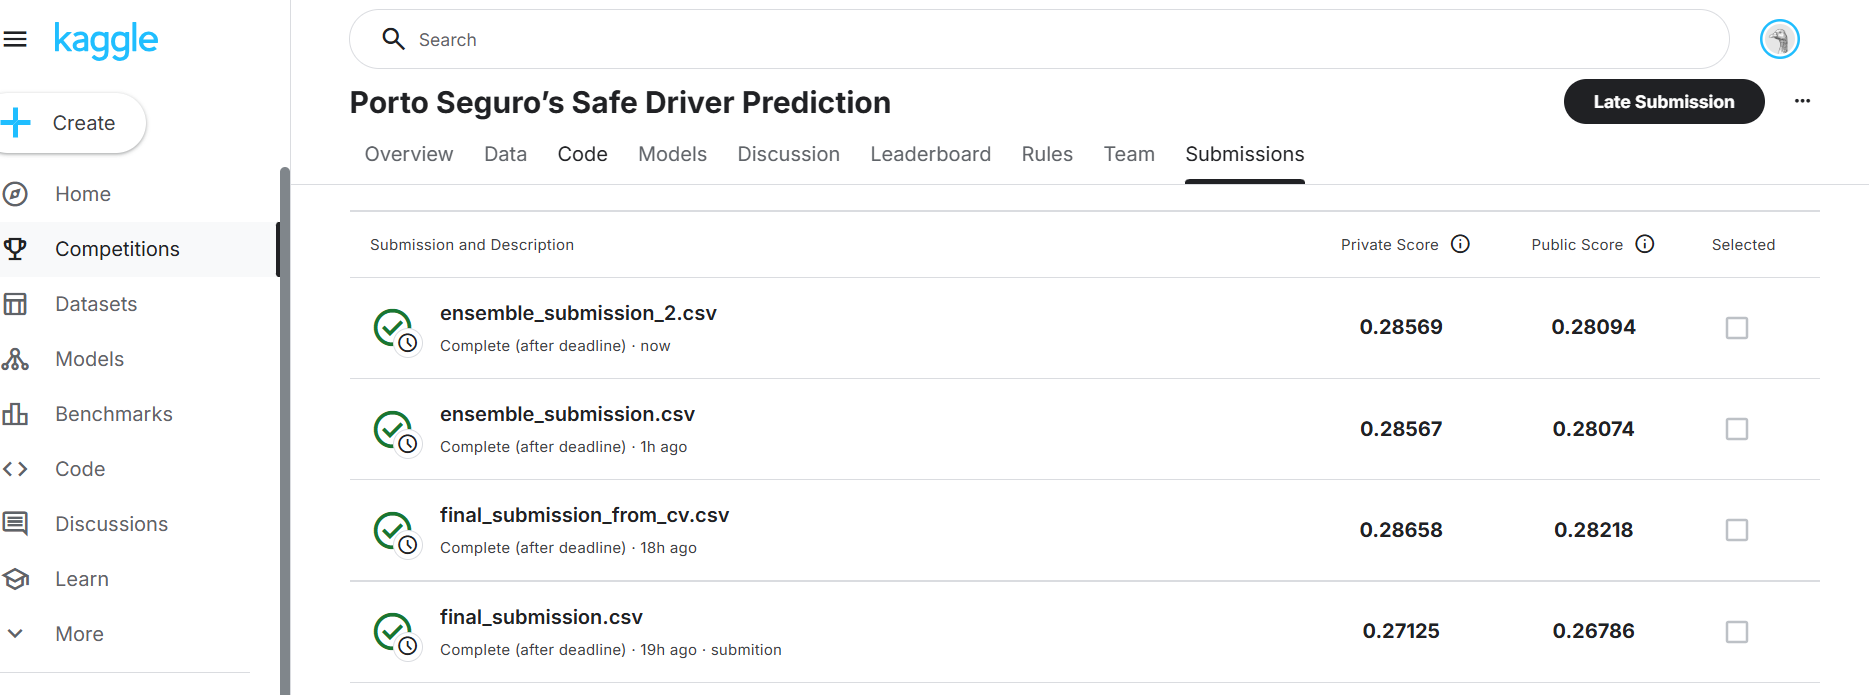

위에서부터 차례대로
1. 0.64 : 0.36 가중치가 적용된 앙상블 기법
2. 5:5 앙상블 기법
3. XGBoost 단일 모델
4. LightGBM 단일 모델

- XGBoost 단일이 가장 좋은 성능을 보였다.

### 스태킹 기법 적용
여러 개의 서로 다른 모델(약한 학습기, Base Learners)들을 먼저 학습시킨 뒤, 이 모델들이 낸 예측값을 모아 최종 메타 모델(Meta Learner) 에 다시 학습시키는 방식이에요.

📌 구조

1단계 (Base Learner 학습)

- 서로 다른 알고리즘을 사용해 여러 모델을 학습시킴
(예: 의사결정나무, 로지스틱 회귀, 랜덤포레스트, SVM 등)

2단계 (Meta Learner 학습)

- 1단계 모델들이 낸 예측 결과(출력값)를 입력으로 받아 또 다른 모델(주로 간단한 모델, 예: 로지스틱 회귀, 선형 회귀 등)을 학습시킴

최종 예측

- 메타 모델이 Base Learner들의 결과를 종합해서 최종 예측을 수행

현재는 모델이 두개밖에 없기 때문에, for문을 돌렸던 이전과 성능이 같은 결과가 나왔다.

In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# 1. 데이터 로드
# 파일 경로는 실제 환경에 맞게 수정해주세요.
try:
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
except FileNotFoundError:
    print("데이터 파일을 찾을 수 없습니다. 디렉토리를 확인해주세요.")
    exit()

# 2. 피처(Feature) 및 타겟(Target) 분리
# id와 target 컬럼을 제외한 모든 컬럼을 피처로 사용합니다.
features = [col for col in train.columns if col not in ['id', 'target']]
X_train = train[features]
y_train = train['target']
X_test = test[features]
test_ids = test['id']

# 3. 모델 학습 및 예측 (교차 검증 사용)
NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)

# OOF(Out-of-Fold) 예측값을 저장할 배열
oof_xgb = np.zeros(len(train))
oof_lgbm = np.zeros(len(train))

# 각 모델의 테스트 데이터 예측 결과를 저장할 배열
xgb_preds = np.zeros(len(X_test))
lgbm_preds = np.zeros(len(X_test))

# 각 폴드의 Gini 점수를 저장할 리스트
gini_scores_xgb = []
gini_scores_lgbm = []

# --- XGBoost 모델 ---
# 여기에 튜닝하신 XGBoost 하이퍼파라미터를 입력하세요.
# 예시 파라미터입니다.
xgb_best_params = {
    'objective': 'binary:logistic', # 이진 분류 문제
    'eval_metric': 'auc',           # 평가지표
    'random_state': 42,
    'n_estimators': 2000,
    # GPU 사용 가능 시, 매우 빠른 학습 가능. CPU 사용 시 'hist' 또는 'auto'
    'device': 'cuda',
    'tree_method': 'hist',
    'learning_rate': 0.01360513985610827,
    'max_depth': 5,
    'subsample': 0.6723083633209394,
    'colsample_bytree': 0.8381085690743174,
    'gamma': 0.7175879330449897,
    'reg_alpha': 0.42338064413698273,
    'reg_lambda': 0.6640984566021599,
    'n_jobs': -1,
    'early_stopping_rounds': 100
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- XGBoost Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = xgb.XGBClassifier(**xgb_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              verbose=False)

    # OOF 예측값 저장
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_xgb[val_idx] = val_preds

    # Gini 점수 계산 및 저장
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_xgb.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # 테스트 데이터에 대한 예측 (확률)
    xgb_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits


# --- LightGBM 모델 ---
# LightGBM도 비슷한 방식으로 하이퍼파라미터를 설정할 수 있습니다.
lgbm_best_params = {
    'learning_rate': 0.03420794608326385,
    'num_leaves': 38,
    'max_depth': 7,
    'subsample': 0.6413217568876542,
    'colsample_bytree': 0.7431271817736341,
    'reg_alpha': 0.9236090281863292,
    'reg_lambda': 0.8629905105928004,
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 42,
    'n_estimators': 2000,
    'n_jobs': -1
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- LightGBM Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = lgb.LGBMClassifier(**lgbm_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              callbacks=[lgb.early_stopping(100, verbose=False)])

    # OOF 예측값 저장
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_lgbm[val_idx] = val_preds

    # Gini 점수 계산 및 저장
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_lgbm.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # 테스트 데이터에 대한 예측 (확률)
    lgbm_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits

# 4. 최종 Gini 점수 계산 및 출력
print("\n" + "="*40)
print(f"XGBoost 평균 Gini 점수: {np.mean(gini_scores_xgb):.5f}")
print(f"LightGBM 평균 Gini 점수: {np.mean(gini_scores_lgbm):.5f}")

# 앙상블 OOF 예측값에 대한 Gini 점수 계산
oof_ensemble = 0.6 * oof_xgb + 0.4 * oof_lgbm
ensemble_gini = 2 * roc_auc_score(y_train, oof_ensemble) - 1
print(f"앙상블 OOF Gini 점수: {ensemble_gini:.5f}")
print("="*40)

# --- 5. 스태킹(Stacking)을 위한 2단계(Level 2) 모델 학습 ---
print("\n" + "="*40)
print("--- Level 2: 메타 모델 학습 시작 ---")

# 1단계 모델들의 OOF 예측값을 2단계 모델의 '학습 데이터'로 사용
# (피처가 2개인 새로운 학습 데이터가 만들어집니다)
X_train_level2 = pd.DataFrame({'xgb': oof_xgb, 'lgbm': oof_lgbm})

# 1단계 모델들의 테스트 데이터 예측값을 2단계 모델의 '테스트 데이터'로 사용
X_test_level2 = pd.DataFrame({'xgb': xgb_preds, 'lgbm': lgbm_preds})

# 메타 모델로 Logistic Regression 사용
# Logistic Regression은 각 모델의 예측 결과를 어떻게 조합할지 학습합니다.
meta_model = LogisticRegression(random_state=42)
meta_model.fit(X_train_level2, y_train)

# 메타 모델의 OOF Gini 점수 확인
meta_oof_preds = meta_model.predict_proba(X_train_level2)[:, 1]
stacking_gini = 2 * roc_auc_score(y_train, meta_oof_preds) - 1
print(f"\n스태킹 앙상블 OOF Gini 점수: {stacking_gini:.5f}")
print("="*40)


# --- 6. 최종 제출 파일 생성 ---
# 2단계 테스트 데이터(X_test_level2)로 최종 예측 생성
stacking_preds = meta_model.predict_proba(X_test_level2)[:, 1]

# 7. 제출 파일 생성
submission = pd.DataFrame({
    'id': test_ids,
    'target': ensemble_preds
})
submission.to_csv('ensemble_stacking_submission.csv', index=False)

print("\n앙상블 완료! 'submission.csv' 파일이 생성되었습니다.")
print(submission.head())

--- XGBoost Fold 1 ---
Fold 1 Gini: 0.2899901040114363
--- XGBoost Fold 2 ---
Fold 2 Gini: 0.2848810972835045
--- XGBoost Fold 3 ---
Fold 3 Gini: 0.28534190008643967
--- XGBoost Fold 4 ---
Fold 4 Gini: 0.28493408159980405
--- XGBoost Fold 5 ---
Fold 5 Gini: 0.2716616406064343
--- LightGBM Fold 1 ---
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Fold 1 Gini: 0.2889003385199478
--- LightGBM Fold 2 ---
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] 

개선점4. 피처 엔지니어링 ( 피처 추가 )


In [2]:
def add_features(df):
    """데이터프레임에 새로운 피처를 추가하는 함수"""
    df_copy = df.copy()

    # 1. 결측값 개수 피처
    df_copy['n_missing'] = (df_copy == -1).sum(axis=1)

    # 2. 이진 피처 합계
    bin_cols = [col for col in df_copy.columns if '_bin' in col]
    df_copy['bin_features_sum'] = df_copy[bin_cols].sum(axis=1)

    # 3. 상호작용 피처 (예시)
    # 상관관계가 높은 친구끼리 곱한 값
    df_copy['ps_car_13_x_ps_reg_03'] = df_copy['ps_car_13'] * df_copy['ps_reg_03']
    df_copy['ps_ind_01_x_ps_ind_03'] = df_copy['ps_ind_01'] * df_copy['ps_ind_03']
    df_copy['ps_car_13_x_ps_car_04_cat'] = df_copy['ps_car_13'] * df_copy['ps_car_04_cat']

    return df_copy

In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# 1. 데이터 로드
# 파일 경로는 실제 환경에 맞게 수정해주세요.
try:
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
except FileNotFoundError:
    print("데이터 파일을 찾을 수 없습니다. 디렉토리를 확인해주세요.")
    exit()

# Feature 엔지니어링
print("피처 엔지니어링을 시작합니다...")
train = add_features(train)
test = add_features(test)
print("새로운 피처가 추가되었습니다.")

# 2. 피처(Feature) 및 타겟(Target) 분리
# id와 target 컬럼을 제외한 모든 컬럼을 피처로 사용합니다.
features = [col for col in train.columns if col not in ['id', 'target']]
X_train = train[features]
y_train = train['target']
X_test = test[features]
test_ids = test['id']

# 3. 모델 학습 및 예측 (교차 검증 사용)
NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)

# OOF(Out-of-Fold) 예측값을 저장할 배열
oof_xgb = np.zeros(len(train))
oof_lgbm = np.zeros(len(train))

# 각 모델의 테스트 데이터 예측 결과를 저장할 배열
xgb_preds = np.zeros(len(X_test))
lgbm_preds = np.zeros(len(X_test))

# 각 폴드의 Gini 점수를 저장할 리스트
gini_scores_xgb = []
gini_scores_lgbm = []

# --- XGBoost 모델 ---
# 여기에 튜닝하신 XGBoost 하이퍼파라미터를 입력하세요.
# 예시 파라미터입니다.
xgb_best_params = {
    'objective': 'binary:logistic', # 이진 분류 문제
    'eval_metric': 'auc',           # 평가지표
    'random_state': 42,
    'n_estimators': 2000,
    # GPU 사용 가능 시, 매우 빠른 학습 가능. CPU 사용 시 'hist' 또는 'auto'
    'device': 'cuda',
    'tree_method': 'hist',
    'learning_rate': 0.01360513985610827,
    'max_depth': 5,
    'subsample': 0.6723083633209394,
    'colsample_bytree': 0.8381085690743174,
    'gamma': 0.7175879330449897,
    'reg_alpha': 0.42338064413698273,
    'reg_lambda': 0.6640984566021599,
    'n_jobs': -1,
    'early_stopping_rounds': 100
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- XGBoost Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = xgb.XGBClassifier(**xgb_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              verbose=False)

    # OOF 예측값 저장
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_xgb[val_idx] = val_preds

    # Gini 점수 계산 및 저장
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_xgb.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # 테스트 데이터에 대한 예측 (확률)
    xgb_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits


# --- LightGBM 모델 ---
# LightGBM도 비슷한 방식으로 하이퍼파라미터를 설정할 수 있습니다.
lgbm_best_params = {
    'learning_rate': 0.03420794608326385,
    'num_leaves': 38,
    'max_depth': 7,
    'subsample': 0.6413217568876542,
    'colsample_bytree': 0.7431271817736341,
    'reg_alpha': 0.9236090281863292,
    'reg_lambda': 0.8629905105928004,
    'objective': 'binary',
    'metric': 'auc',
    'random_state': 42,
    'n_estimators': 2000,
    'n_jobs': -1
}

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print(f"--- LightGBM Fold {fold_ + 1} ---")
    trn_data, trn_y = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
    val_data, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]

    model = lgb.LGBMClassifier(**lgbm_best_params)
    model.fit(trn_data, trn_y,
              eval_set=[(val_data, val_y)],
              callbacks=[lgb.early_stopping(100, verbose=False)])

    # OOF 예측값 저장
    val_preds = model.predict_proba(val_data)[:, 1]
    oof_lgbm[val_idx] = val_preds

    # Gini 점수 계산 및 저장
    auc = roc_auc_score(val_y, val_preds)
    gini = 2 * auc - 1
    gini_scores_lgbm.append(gini)
    print(f"Fold {fold_ + 1} Gini: {gini}")

    # 테스트 데이터에 대한 예측 (확률)
    lgbm_preds += model.predict_proba(X_test)[:, 1] / folds.n_splits

# 4. 최종 Gini 점수 계산 및 출력
print("\n" + "="*40)
print(f"XGBoost 평균 Gini 점수: {np.mean(gini_scores_xgb):.5f}")
print(f"LightGBM 평균 Gini 점수: {np.mean(gini_scores_lgbm):.5f}")

# 앙상블 OOF 예측값에 대한 Gini 점수 계산
oof_ensemble = 0.6 * oof_xgb + 0.4 * oof_lgbm
ensemble_gini = 2 * roc_auc_score(y_train, oof_ensemble) - 1
print(f"앙상블 OOF Gini 점수: {ensemble_gini:.5f}")
print("="*40)

# --- 5. 스태킹(Stacking)을 위한 2단계(Level 2) 모델 학습 ---
print("\n" + "="*40)
print("--- Level 2: 메타 모델 학습 시작 ---")

# 1단계 모델들의 OOF 예측값을 2단계 모델의 '학습 데이터'로 사용
# (피처가 2개인 새로운 학습 데이터가 만들어집니다)
X_train_level2 = pd.DataFrame({'xgb': oof_xgb, 'lgbm': oof_lgbm})

# 1단계 모델들의 테스트 데이터 예측값을 2단계 모델의 '테스트 데이터'로 사용
X_test_level2 = pd.DataFrame({'xgb': xgb_preds, 'lgbm': lgbm_preds})

# 메타 모델로 Logistic Regression 사용
# Logistic Regression은 각 모델의 예측 결과를 어떻게 조합할지 학습합니다.
meta_model = LogisticRegression(random_state=42)
meta_model.fit(X_train_level2, y_train)

# 메타 모델의 OOF Gini 점수 확인
meta_oof_preds = meta_model.predict_proba(X_train_level2)[:, 1]
stacking_gini = 2 * roc_auc_score(y_train, meta_oof_preds) - 1
print(f"\n스태킹 앙상블 OOF Gini 점수: {stacking_gini:.5f}")
print("="*40)


# --- 6. 최종 제출 파일 생성 ---
# 2단계 테스트 데이터(X_test_level2)로 최종 예측 생성
stacking_preds = meta_model.predict_proba(X_test_level2)[:, 1]

# 7. 제출 파일 생성
submission = pd.DataFrame({
    'id': test_ids,
    'target': stacking_preds
})
submission.to_csv('ensemble_stacking_with_new_feature_submission.csv', index=False)

print("\n앙상블 완료! 'submission.csv' 파일이 생성되었습니다.")
print(submission.head())

피처 엔지니어링을 시작합니다...
새로운 피처가 추가되었습니다.
--- XGBoost Fold 1 ---
Fold 1 Gini: 0.2910628552597285
--- XGBoost Fold 2 ---
Fold 2 Gini: 0.2836987962499291
--- XGBoost Fold 3 ---
Fold 3 Gini: 0.2853349786691728
--- XGBoost Fold 4 ---
Fold 4 Gini: 0.284231233320539
--- XGBoost Fold 5 ---
Fold 5 Gini: 0.27284520974263105
--- LightGBM Fold 1 ---
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Fold 1 Gini: 0.2879833214445269
--- LightGBM Fold 2 ---
[LightGBM] [Info] Number of positive: 17355, numb

- 오히려 성능이 떨어졌다...
- 피처 엔지니어링의 길은 멀다